In [419]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [421]:
cur = con.cursor()
cur.execute('select unique_id,entering_visit,adview,lead,open_site,time_spent from ct_nha.mkt_define_buyer_app')
table = cur.fetchall()

In [422]:
df = pd.DataFrame(table, columns=['unique_id','EV','adview','lead','open_site','time_spent'])

In [423]:
df['EV'] = df['EV'].astype('float')
df['adview'] = df['adview'].astype('float')
df['lead'] = df['lead'].astype('float')
df['open_site'] = df['open_site'].astype('float')
df['time_spent'] = df['time_spent'].astype('float')

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184156 entries, 0 to 184155
Data columns (total 6 columns):
unique_id     184155 non-null object
EV            184155 non-null float64
adview        156798 non-null float64
lead          28037 non-null float64
open_site     184155 non-null float64
time_spent    184155 non-null float64
dtypes: float64(5), object(1)
memory usage: 8.4+ MB


In [425]:
df.dropna(subset=['unique_id'],how='all',inplace=True)

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184155 entries, 0 to 184155
Data columns (total 6 columns):
unique_id     184155 non-null object
EV            184155 non-null float64
adview        156798 non-null float64
lead          28036 non-null float64
open_site     184155 non-null float64
time_spent    184155 non-null float64
dtypes: float64(5), object(1)
memory usage: 9.8+ MB


In [427]:
df.head()

,unique_id,EV,adview,lead,open_site,time_spent
0,-5845554329077482100,45.0,467.0,NaN,7.0,3732.0
1,-7035673743656120698,26.0,262.0,7.0,6.0,3015.0
2,-6837294526721035123,26.0,68.0,NaN,7.0,2825.0
3,-8702352662730898996,25.0,298.0,1.0,6.0,5707.0
4,-5366375133062290962,32.0,183.0,4.0,7.0,1996.0


In [428]:
#df.replace({'Login with phone':1,'None Logged-in user':0,'None Logged-in':0,'-':0,'Login with Facebook':1,'Login with phone & Fb':1},inplace=True)

In [429]:
df.head()

,unique_id,EV,adview,lead,open_site,time_spent
0,-5845554329077482100,45.0,467.0,NaN,7.0,3732.0
1,-7035673743656120698,26.0,262.0,7.0,6.0,3015.0
2,-6837294526721035123,26.0,68.0,NaN,7.0,2825.0
3,-8702352662730898996,25.0,298.0,1.0,6.0,5707.0
4,-5366375133062290962,32.0,183.0,4.0,7.0,1996.0


In [430]:
df.fillna(0,inplace=True)

In [431]:
df.describe()

,EV,adview,lead,open_site,time_spent
count,184155.000000,184155.000000,184155.000000,184155.000000,184155.000000
mean,3.265782,28.280698,0.818794,2.232293,1439.987511
std,5.427621,81.437762,17.850883,1.707563,1734.095870
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,348.000000
50%,1.000000,6.000000,0.000000,1.000000,873.000000
75%,3.000000,25.000000,0.000000,3.000000,1883.000000
max,152.000000,7343.000000,5201.000000,7.000000,32871.000000


In [432]:
cur.close()
con.close()

In [433]:
df = df[df.open_site >0]

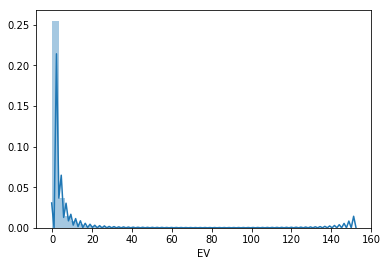

In [434]:
sns.distplot(df.EV)

In [435]:
df.EV[df.EV > 20] = 21

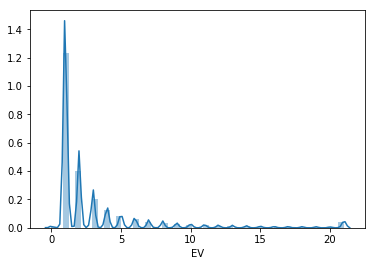

In [436]:
sns.distplot(df.EV)

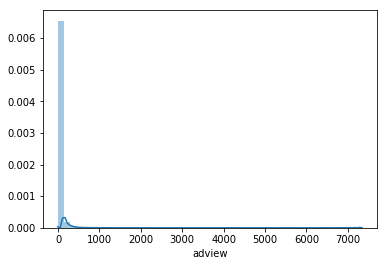

In [437]:
sns.distplot(df.adview,bins=50)

In [438]:
df.adview[df.adview > 200] = 250

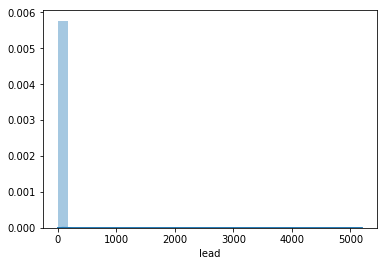

In [439]:
sns.distplot(df.lead,bins=30)

In [440]:
df.lead[df.lead > 2] = 4

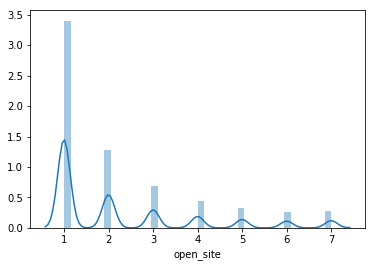

In [441]:
sns.distplot(df.open_site,bins=40)

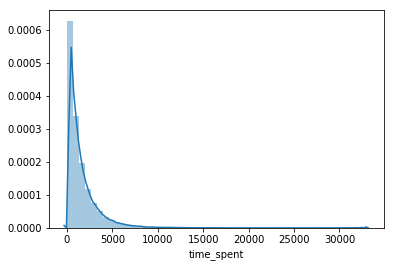

In [442]:
sns.distplot(df.time_spent,bins=50)

In [443]:
df.time_spent[df.time_spent > 6000] = 6100

In [130]:
df_loggin = df[df['login_user']==1]
df_loggin = df_loggin[df_loggin['adview'] < 7343]
df_loggin = df_loggin[df_loggin['lead'] < 5201]

df_nonloggin = df_nonloggin[df_nonloggin['login_user']==0]
df_nonloggin = df_nonloggin[df_nonloggin['adview'] < 7343]
df_nonloggin = df_nonloggin[df_nonloggin['lead'] < 5201]

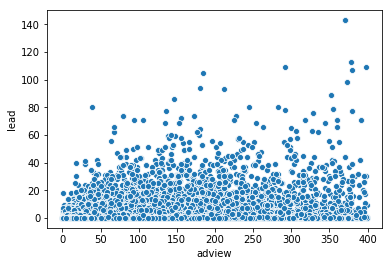

In [42]:
sns.scatterplot(x='adview',y='lead',data=df)

In [444]:
df.head()

,unique_id,EV,adview,lead,open_site,time_spent
0,-5845554329077482100,21.0,250.0,0.0,7.0,3732.0
1,-7035673743656120698,21.0,250.0,4.0,6.0,3015.0
2,-6837294526721035123,21.0,68.0,0.0,7.0,2825.0
3,-8702352662730898996,21.0,250.0,1.0,6.0,5707.0
4,-5366375133062290962,21.0,183.0,4.0,7.0,1996.0


In [445]:
X = df.iloc[:, [1, 5]].values

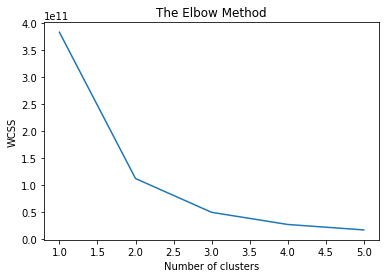

In [446]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [473]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [474]:
df['cluster']= kmeans.labels_

In [475]:
df.head()

,unique_id,EV,adview,lead,open_site,time_spent,cluster
0,-5845554329077482100,21.0,250.0,0.0,7.0,3732.0,0
1,-7035673743656120698,21.0,250.0,4.0,6.0,3015.0,0
2,-6837294526721035123,21.0,68.0,0.0,7.0,2825.0,0
3,-8702352662730898996,21.0,250.0,1.0,6.0,5707.0,3
4,-5366375133062290962,21.0,183.0,4.0,7.0,1996.0,2


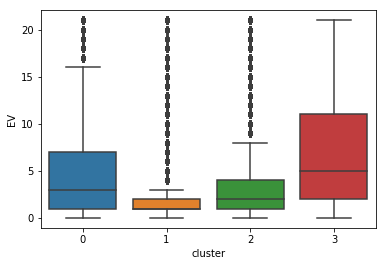

In [476]:
sns.boxplot(df.cluster,df.EV)

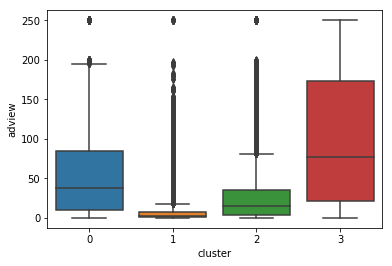

In [477]:
sns.boxplot(df.cluster,df.adview)

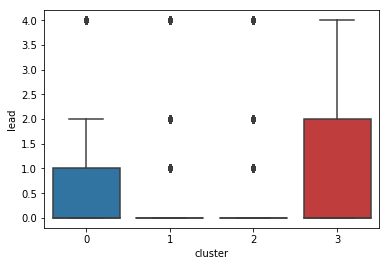

In [478]:
sns.boxplot(df.cluster,df.lead)

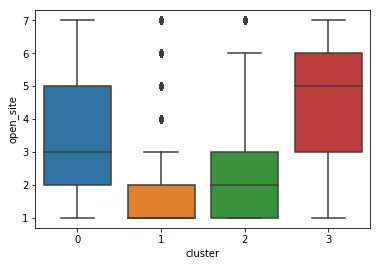

In [479]:
sns.boxplot(df.cluster,df.open_site)

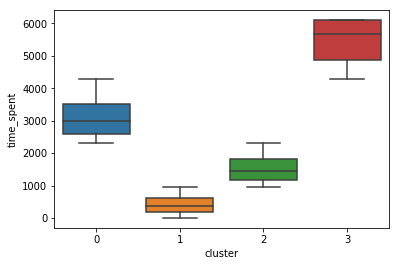

In [480]:
sns.boxplot(df.cluster,df.time_spent)

In [483]:
for x in range(0,4):
    print(df[df.cluster == x].describe())

                 EV        adview          lead     open_site    time_spent  \
count  23932.000000  23932.000000  23932.000000  23932.000000  23932.000000   
mean       5.455833     60.067817      0.813555      3.578138   3086.390105   
std        5.505936     66.316988      1.442649      1.955876    551.298320   
min        0.000000      0.000000      0.000000      1.000000   2302.000000   
25%        1.000000     10.000000      0.000000      2.000000   2603.000000   
50%        3.000000     38.000000      0.000000      3.000000   3001.000000   
75%        7.000000     84.000000      1.000000      5.000000   3509.250000   
max       21.000000    250.000000      4.000000      7.000000   4283.000000   

       cluster  
count  23932.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
                EV        adview          lead     open_site    time_spent  \
count  97802.00000  97802.000000  97802.000000  97802.000

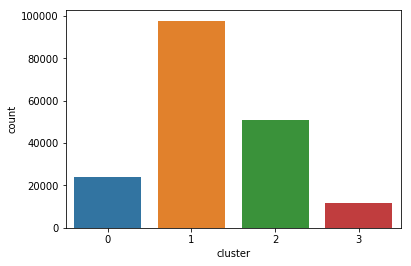

In [482]:
sns.countplot(x='cluster',data=df)

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184155 entries, 0 to 184155
Data columns (total 7 columns):
unique_id     184155 non-null object
EV            184155 non-null float64
adview        184155 non-null float64
lead          184155 non-null float64
open_site     184155 non-null float64
time_spent    184155 non-null float64
cluster       184155 non-null int32
dtypes: float64(5), int32(1), object(1)
memory usage: 15.5+ MB


In [394]:
df[df.lead == 0].describe()

,EV,adview,lead,open_site,time_spent,cluster
count,156119.000000,156119.000000,156119.0,156119.000000,156119.000000,156119.000000
mean,2.542349,15.726849,0.0,1.977363,1185.901056,0.355184
std,3.203041,32.287837,0.0,1.499493,1295.453418,0.596290
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.0,1.000000,296.000000,0.000000
50%,1.000000,4.000000,0.0,1.000000,737.000000,0.000000
75%,3.000000,15.000000,0.0,2.000000,1584.000000,1.000000
max,21.000000,250.000000,0.0,7.000000,6100.000000,2.000000
